In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')

In [5]:
train.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


In [29]:
train.shape

(30083, 16)

In [115]:
import PIL
def getimg(UID):
    return (PIL.Image.open(f'data/train/{UID}.jpg'))

In [119]:
from IPython.display import Image
def showimg(UID):
    display(Image(f'data/train/{UID}.jpg'))

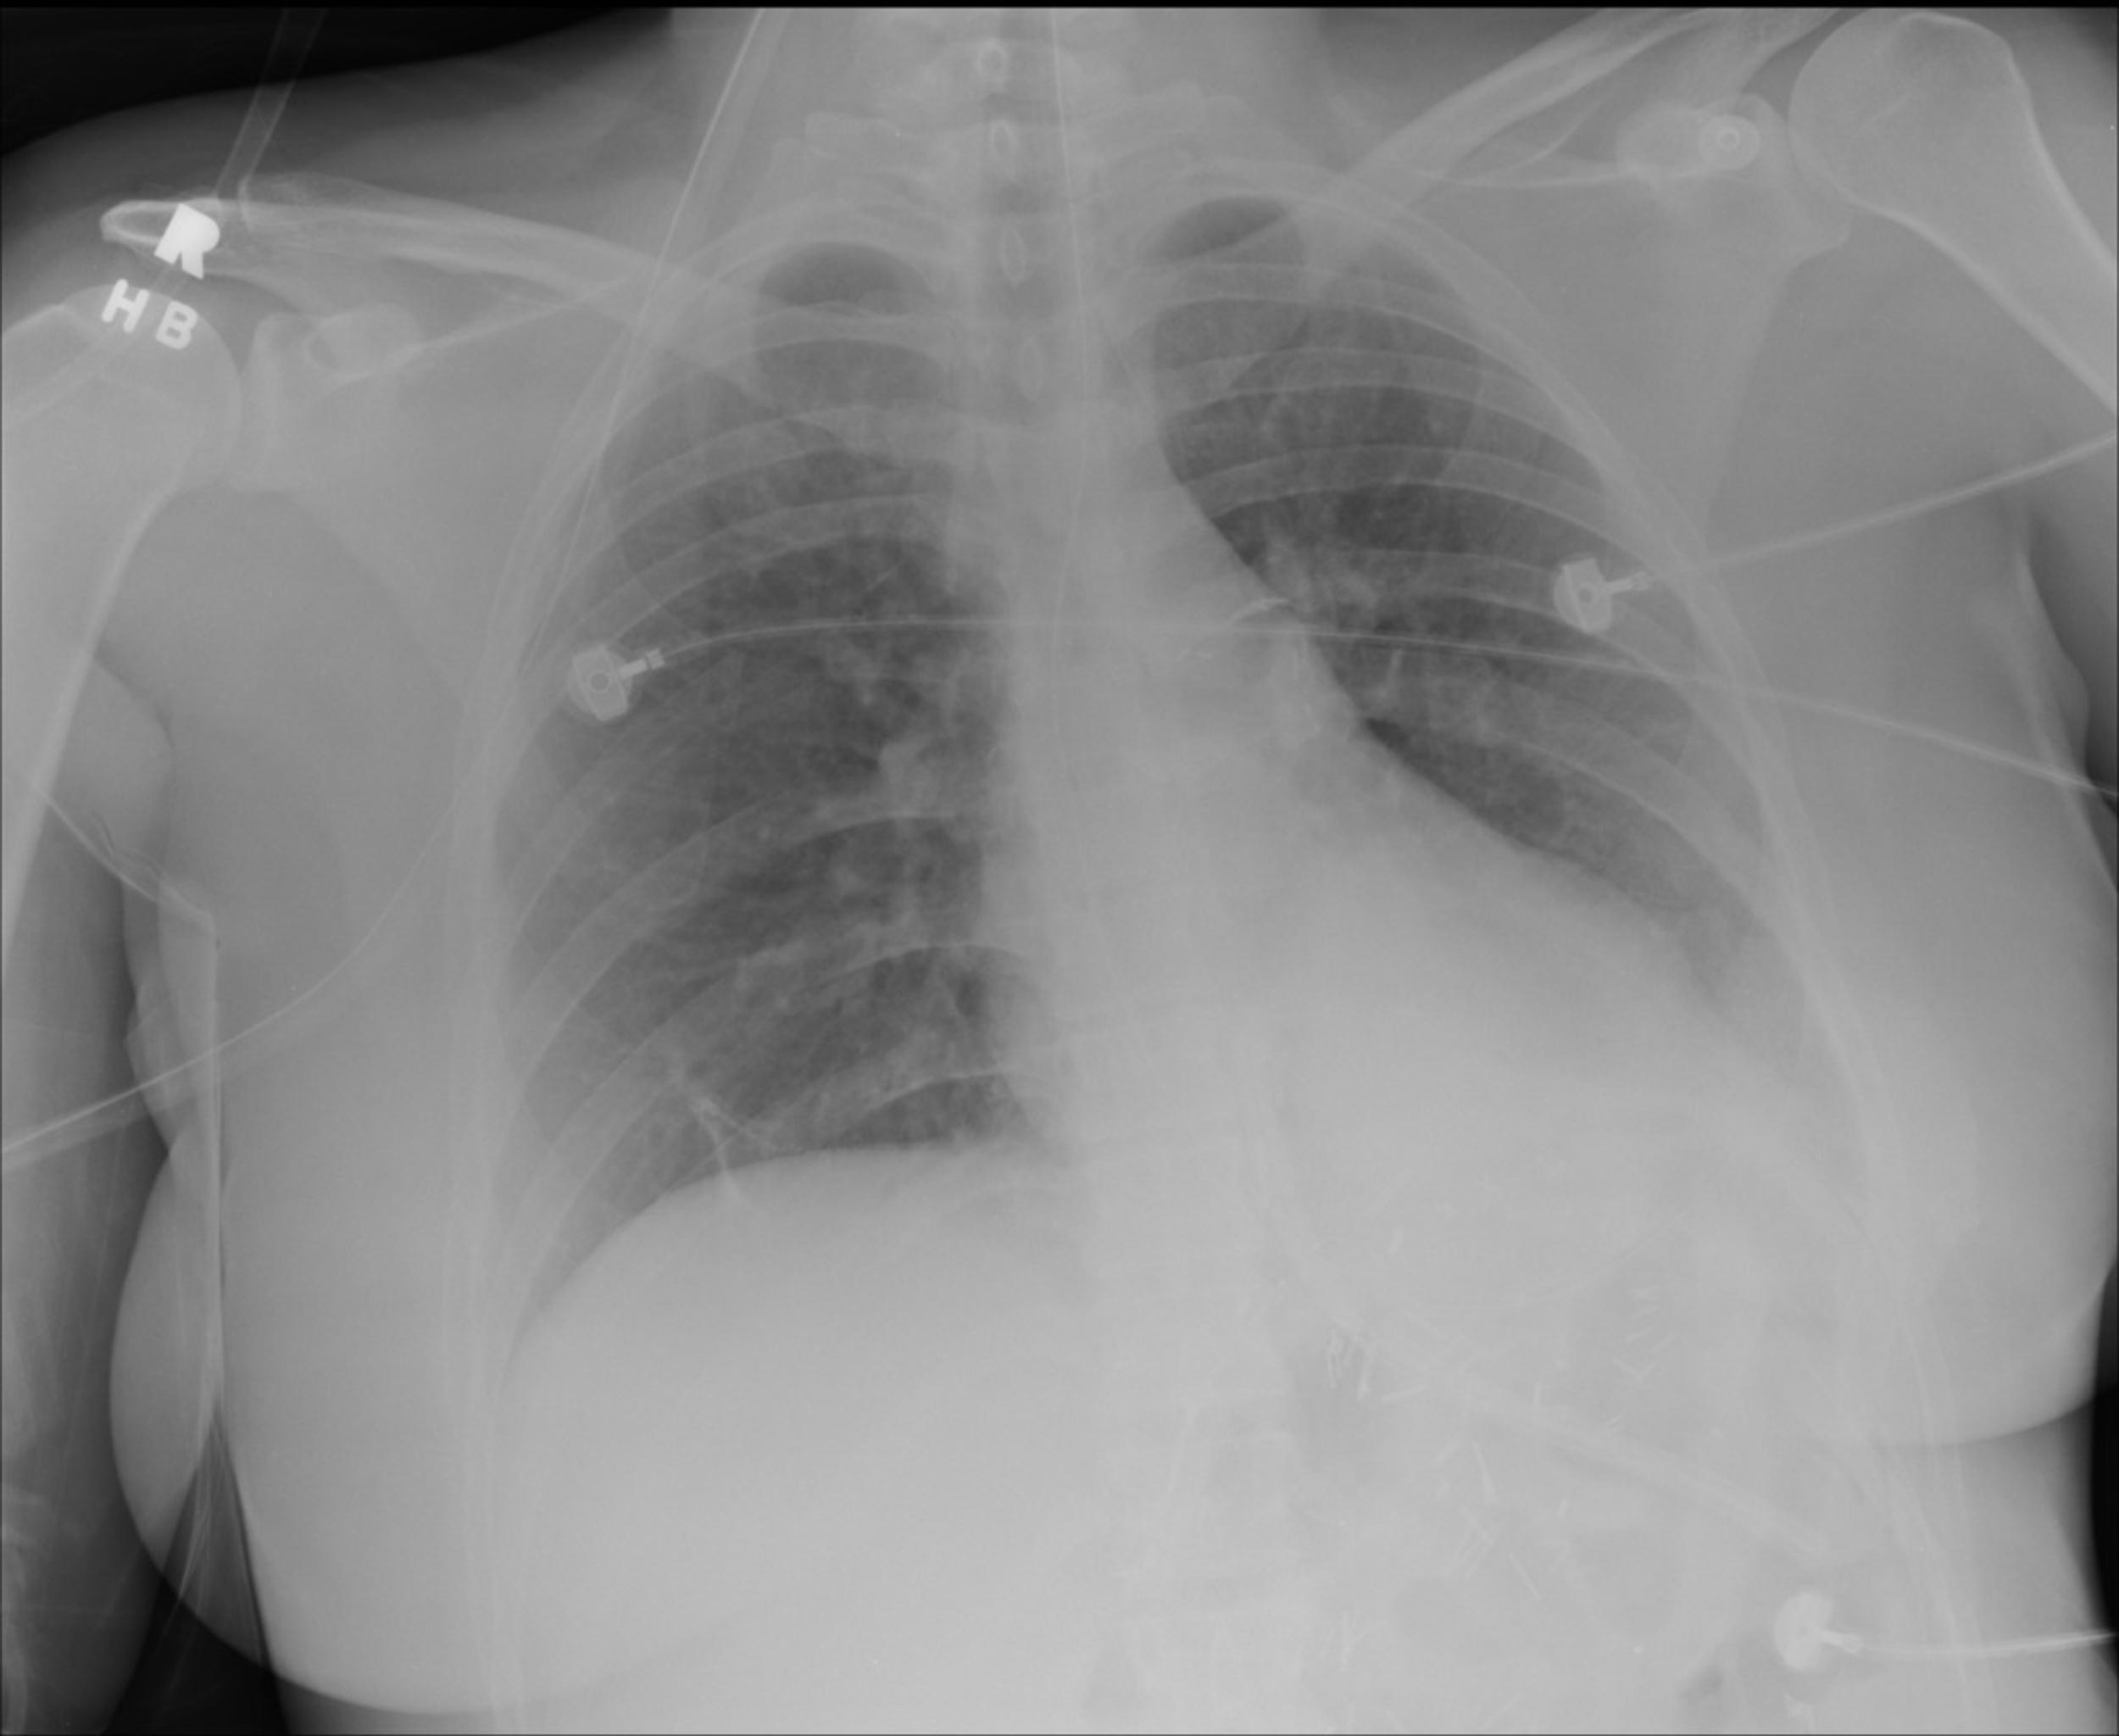

In [120]:
showimg(train['StudyInstanceUID'][0])

In [129]:
img = getimg(train['StudyInstanceUID'][0])
np.asarray(img).shape

(2048, 2500)

In [9]:
categories = train.columns[1:]
train['EET']

Index(['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal',
       'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal',
       'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
       'Swan Ganz Catheter Present', 'PatientID'],
      dtype='object')

In [18]:
train['EET'] = (train.iloc[:,1:4]==1).any(axis=1).apply(lambda x: 1 if x else 0)
train['NGT'] = (train.iloc[:,4:8]==1).any(axis=1).apply(lambda x: 1 if x else 0)
train['CVC'] = (train.iloc[:,8:11]==1).any(axis=1).apply(lambda x: 1 if x else 0)

In [135]:
train[((train.iloc[:,1:4]==1).sum(axis=1) > 1)].shape[0]

0

In [134]:
train[((train.iloc[:,4:8]==1).sum(axis=1) > 1)].shape[0]

45

In [136]:
train[((train.iloc[:,8:11]==1).sum(axis=1) > 1)].shape[0]

3575

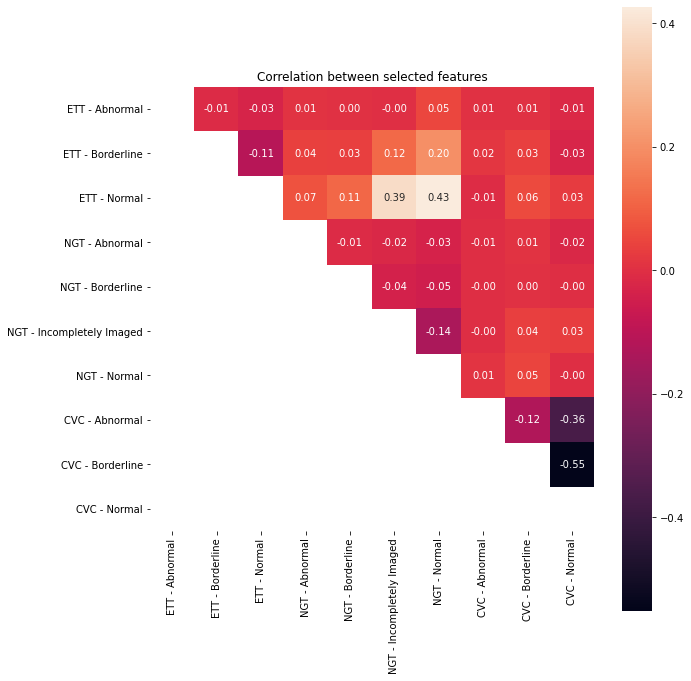

In [148]:
plt.figure(figsize=(10,10))
corr = train.iloc[:,1:11].corr(method='spearman')
mask = np.tril(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, square=True)
plt.title('Correlation between selected features')
plt.tight_layout()
plt.show()

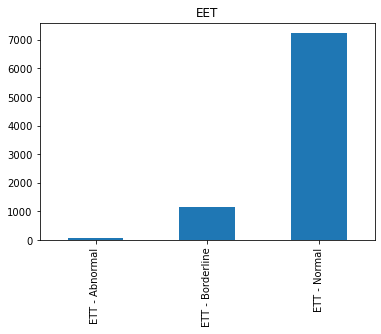

In [162]:
train.iloc[:,1:4].sum().plot.bar()
plt.title('EET')
plt.show()

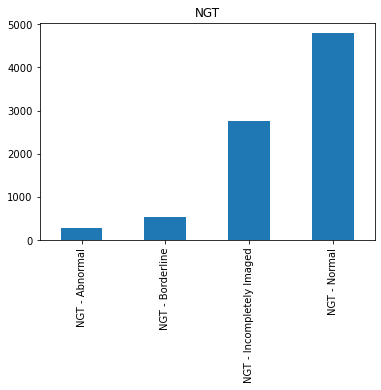

In [167]:
train.iloc[:,4:8].sum().plot.bar()
plt.title('NGT')
plt.show()

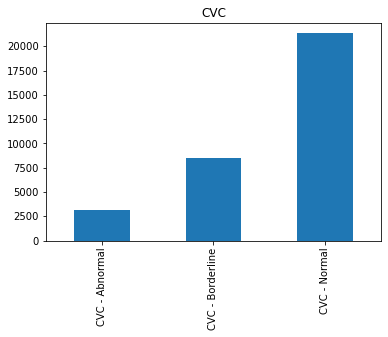

In [164]:
train.iloc[:,8:11].sum().plot.bar()
plt.title('CVC')
plt.show()